로지스틱회귀


로지스틱 함수의 이전 형태: 로짓함수 <br>

로짓함수에 대해 말할때는 확률 변수 p의 작업을 작업한다<br>
좀더 구체적으로는, 베루누이 분포에 대해 대응된다

문제의식 <br>
다중선형회귀(Multiple Linear Regression)는 수치형 설명변수 X와 연속형 숫자로 이뤄진 종속변수 Y 간의 관계를 선형으로 가정하고 이를 가장 잘 표현할 수 있는 회귀계수를 데이터로부터 추정하는 모델입니다. 이 회귀계수들은 모델의 예측값과 실제값의 차이, 즉 오차제곱합(error sum of squares)을 최소로 하는 값들입니다. 이를 만족하는 최적의 계수들은 회귀계수에 대해 미분한 식을 0으로 놓고 풀면 명시적인 해를 구할 수 있습니다. 선형회귀의 파라메터 추정과 관련해서는 이곳을 참고하시면 좋을 것 같습니다.

어쨌든 설명변수가 p개인 다중선형회귀의 일반 식은 아래와 같이 쓸 수 있습니다.

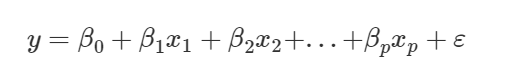


In [14]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
import seaborn.apionly as sns
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(style='whitegrid',context='notebook')

In [15]:
df=pd.read_csv("CHD.csv")

In [16]:
df.head()

,age,chd
0,20,0
1,23,0
2,24,0
3,25,0
4,25,1


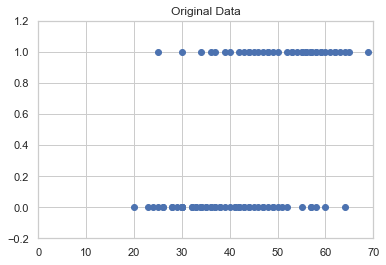

In [59]:
plt.figure()
plt.axis([0,70,-0.2,1.2])
plt.title("Original Data")
plt.scatter(df['age'],df['chd'])


이제는 scikit-learn의 로지스틱 회귀 객체를 사용해 로지스틱 회귀 모델을 만든 다음 fit함수를 호출합니다

이 함수는 훈련 데이터의 예측 오차를 최소화 시키는 시그모이드를 만듭니다!

In [63]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(df['age'].values.reshape(-1,1),df['chd'].values.reshape(-1,1))

C:\Users\hieun\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hieun\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

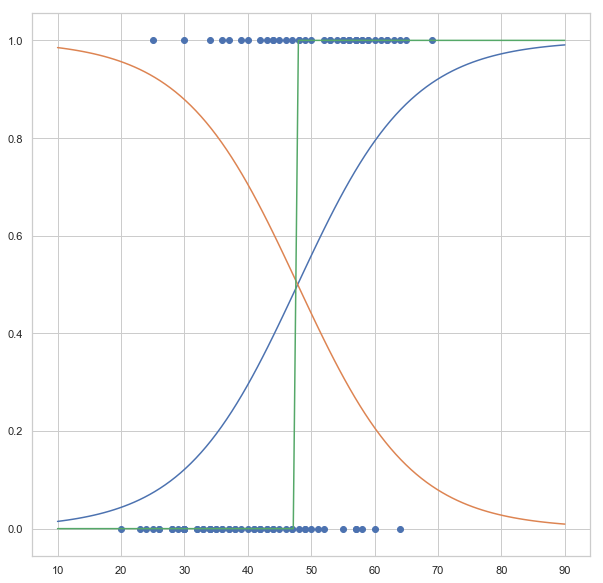

In [65]:
x_plot = np.linspace(10, 90, 100)
oneprob=[]
zeroprob=[]
predict=[]
plt.figure(figsize=(10,10))
for i in x_plot:
    oneprob.append (logistic.predict_proba(np.array([[i]]))[0][1]);
    zeroprob.append (logistic.predict_proba(np.array([[i]]))[0][0]);
    predict.append (logistic.predict(np.array([[i]]))[0]);

plt.plot(x_plot, oneprob);
plt.plot(x_plot, zeroprob)
plt.plot(x_plot, predict);
plt.scatter(df['age'],df['chd'])


# 예제2


In [87]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
data = pd.read_csv('train_V2.csv', nrows=10000)
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [88]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [94]:
winP=data.loc[(data["winPlacePerc"]==1) | (data["winPlacePerc"]==0)]
winP["winPlacePerc"].head()

6     0.0
29    0.0
62    0.0
67    1.0
74    0.0
Name: winPlacePerc, dtype: float64

In [104]:
x = winP[['walkDistance', 'kills', 'weaponsAcquired','rideDistance']]  #변수 지정
y = winP[['winPlacePerc']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [105]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() #로지스틱 회귀분석 시행

log.fit(x_train, y_train) #모델의 정확도 확인
print('학습용 데이터셋 정확도 : %.2f' % log.score(x_train, y_train))
print('검증용 데이터셋 정확도 : %.2f' % log.score(x_test, y_test))

학습용 데이터셋 정확도 : 0.99
검증용 데이터셋 정확도 : 0.99


C:\Users\hieun\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hieun\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
from sklearn.metrics import classification_report
y_pred=log.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       139
         1.0       1.00      0.97      0.98        92

   micro avg       0.99      0.99      0.99       231
   macro avg       0.99      0.98      0.99       231
weighted avg       0.99      0.99      0.99       231



이 모델의 정밀도의 수치는 0.99, 재현율의 수치는 0.99로 나타났다.


이제 모델의 회귀계수와 오즈비를 구해 독립변수가 분류 결정에 미치는 영향의 정도를 알아보기 위해 다른 방식의 로지스틱회귀분석을 진행해보자. logit이란 변수에 합격여부를 종속변수로 하는 데이터를 넣고, 앞서 넣은 독립변수 x값도 입력한 뒤 적합 시켜준다. 

In [107]:
import statsmodels.api as sm
logit = sm.Logit(winP[['winPlacePerc']],x) #로지스틱 회귀분석 시행
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.373014
         Iterations 11


In [114]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           winPlacePerc   No. Observations:                  770
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Sep 2019   Pseudo R-squ.:                  0.4322
Time:                        16:18:06   Log-Likelihood:                -287.22
converged:                       True   LL-Null:                       -505.83
                                        LLR p-value:                 1.918e-94
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
walkDistance        0.0038      0.000      7.866      0.000       0.003       0.005
kills               1.3222      0.322      4.104      0.000       0.691       1.954
weaponsAcquired    -1.2434      0.138     -9.023      0.000      -1.514      -0.973
rideDistance        0.0025      0.001      2.200      0.028       0.000       0.005
===================================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

cf>
각 회귀계수가 합격여부에 어떻게 영향을 미치는지 확인해보자. <br>
먼저, 유의확률을 본다. 학점 변수만 유의수준 99%에서 종속변수에 영향을 주는 유의한 변수임을 알 수 있다.

편회귀계수값의 부호를 통해 종속변수에 미치는 영향의 방향을 파악할 수 있다. 편회귀계수의 값이 양수라면 합격여부가 '1'일 확률이 높아진다는 뜻이다. 반대로 음수라면 합격여부의 값이 '0'일 확률이 높아진다는 뜻이다. 따라서 모형의 회귀계수 분석결과는 다음과 같다.


<strong>weaponsAcqured는 음의 상관관계, kills는 양의 상관관계를 의미하며 가장 winp=1인 것과는 kills와 관계가 높다</strong>


logit 함수를 통해 수치화

In [115]:
np.exp(result.params)

walkDistance       1.003815
kills              3.751577
weaponsAcquired    0.288389
rideDistance       1.002513
dtype: float64

오즈비가 1을 기준으로 큰지 작은지를 파악하여 종속변수에 미치는 영향의 방향을 파악할 수 있다. 독립변수가 두개 이상 있을 때는 다른 독립변수를 일정한 값으로 고정한 경우의 오즈비로 해석된다. 아무런 관계없을 때 오즈비는 1이다. 1에서 멀리 떨어질수록 종속변수와의 관계가 강하다는 뜻이다. 즉, 종속변수 여부에 큰 영향을 준다는 뜻이다.  오즈비는 1을 기준으로 영향을 판단하므로, 오즈비가 10인 경우와 0.1인 경우는 종속변수에 영향을 주는 강도가 같다. 입시점수 변수의 경우, 극도로 1에 가까운 값으로 나타난다. 


독립변수가 수치형일 경우 또 다르게 오즈비해석을 할 수 있다. kills의 수가 1단위 증가하면 합격할 승률의 퍼센테지가 3.75 증가,<br>
weaponsAc가 1단위 증가하면 승률이 0에 가까워질 0.288퍼센트가 증가한
